<a href="https://colab.research.google.com/github/Adityac115/Housing_Price_Prediction/blob/master/Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd # Data Manipulation, Data Cleaning, Data Exploration, Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:

url = 'https://raw.githubusercontent.com/Adityac115/Housing.scv/main/Housing.csv'
df = pd.read_csv(url)

**Data Inpection**

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [ ]:
df.describe

<bound method NDFrame.describe of         price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


**Data Cleaning**

In [ ]:
df.isnull().sum()*100/df.shape[0]

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

**Data Preperation**

In [ ]:
# changing from yes and no to 0 and 1 
var=['mainroad',  'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def bmap(x):
  return x.map({'yes' : 1, "no" :0})

df[var]=df[var].apply(bmap)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
dummy=pd.get_dummies(df['furnishingstatus'],drop_first=True)

In [ ]:
dummy.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
df=pd.concat([df,dummy],axis=1)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [ ]:
df.drop(['furnishingstatus'] , axis=1 , inplace =True)

In [ ]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [ ]:
X=df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished']]
y=df['price']

In [ ]:
df.ndim

2

In [ ]:
X.ndim

2

In [ ]:
y.ndim

1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
coeff_df=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])

In [ ]:
coeff_df

,Coefficient
area,2.201748e+02
bedrooms,1.080092e+05
bathrooms,1.010948e+06
stories,4.373075e+05
mainroad,4.422879e+05
guestroom,2.611578e+05
basement,3.399120e+05
hotwaterheating,1.014224e+06
airconditioning,9.032978e+05
parking,2.801655e+05


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([6015954.57554308, 6055582.82605914, 7694009.69784389,
       4166990.85061632, 6072007.86895053, 5460728.89443958,
       3043660.39794934, 6791639.81245372, 6132817.29925905,
       3120579.45282958, 6923126.195858  , 2643906.47596998,
       3348862.99190381, 3603595.2371841 , 6591426.56789962,
       4317024.41964161, 7294431.79333091, 5085511.38948087,
       3958201.06299251, 6423575.72901472, 3677461.37930239,
       5843357.2925191 , 6529779.03235755, 5690144.13851626,
       6163102.41747191, 5294188.89246529, 6302894.81659588,
       2537833.09727268, 6260471.46144904, 5833677.702605  ,
       5705020.15712341, 4585320.07290357, 6450840.02956047,
       4569271.14750357, 2946963.26184614, 4296305.46619195,
       3997662.34397799, 3351762.98510575, 2038423.31094707,
       4584918.97464992, 4501081.81303068, 2161474.14908564,
       4204536.32461118, 2857630.07995835, 5121753.4221469 ,
       5105407.11046215, 2260676.32864645, 5095455.23661713,
       3612089.70269919,

In [ ]:
  model.predict([[7420,	4,	2,	3,	1,	0,	0,	0,	1,	2,	1	,0	,0]])

array([8158427.71979171])

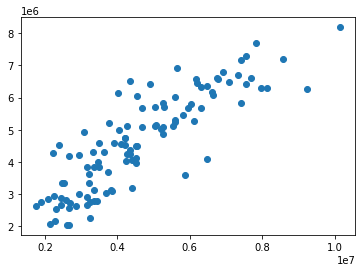

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
r2_score(y_test, y_pred)

0.7350736921763357